Authors:

Juan Pablo Enríquez Pedroza 0228903

Ulises Gallardo Rodríguez   0229261

## Functions

In [109]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random

In [110]:
calls = 0 #Total calls of objetive function

In [111]:
def get_population(n,board_size = 8):
  population = np.zeros([n, board_size], dtype = "int32")

  for i in range(n): 
    population[i] = range(board_size)
    for j in range(board_size):
      x,y = 0,0
      while (x==y):
        x = np.random.randint(0,board_size)
        y = np.random.randint(0,board_size) 
      population[i][x], population[i][y] = population[i][y], population[i][x]
      
  return population

In [112]:
def f(board):
  global calls
  calls+=1
  cost = 0
  for j in range(len(board)):
    for jj in range(j+1,len(board)):
      if (board[j] + (jj - j)) == board[jj] or (board[j] - (jj - j)) == board[jj]:
        cost += 1

  return cost

In [113]:
def plot_solution(individual, board_size = 8):
  chessboard = np.zeros((board_size,board_size))

  chessboard[1::2,0::2] = 1
  chessboard[0::2,1::2] = 1

  plt.imshow(chessboard, cmap='binary')
  for i in range(len(individual)):
      plt.text( i,individual[i], '♕', fontsize=25, ha='center', va='center', color='black' if (i - individual[i] ) % 2 == 0 else 'white')
  plt.show()

## Selection

In [114]:
def roulette_selection(fitness):
  range_probability = np.zeros((len(fitness), 2))
  range_probability[0][0]=0
  total = np.sum(fitness)

  new_total = 0
  aux = fitness.copy()
  for i in range(len(aux)):
    aux[i] = total - fitness[i]
    new_total += aux[i]

  for i in range(len(aux)):
    PN = (aux[i])/new_total
    if i>0:
      range_probability[i][0] = range_probability[i-1][1]
      range_probability[i][1] = range_probability[i-1][1]+PN
    else:
      range_probability[i][0] = 0
      range_probability[i][1] = PN
  p = np.random.random() 
  #print(range_probability)
  for i in range(len(range_probability)):
    if p >=range_probability[i][0] and p<range_probability[i][1]:
      return i


In [115]:
def tournament_selection(fitness, k = 2):
  parents = random.sample(range(0, len(fitness)), k)
  winner = np.argmin(fitness[parents])
  return(parents[winner])

## Mutation

In [116]:
def swap_mutation(individual, Pm): 
  m = len(individual)
  limit = m-1 
  x = np.random.randint(1,limit)
  y = np.random.randint(1,limit)
  individual[x], individual[y] = individual[y], individual[x]
  return individual

In [117]:
def mutate(Population, Pm): 
  
  for i in range(len(Population)):
    p = np.random.random()
    if p < Pm:
      Population[i] = swap_mutation(Population[i],Pm)

  return Population

## Crossover

In [118]:
def simple_permutation_crossover(parentA, parentB):
  offspring = np.zeros(parentA.shape, dtype = np.chararray)
  offspring[:int(len(parentA)/2)] = parentA[:int(len(parentA)/2)]
  offspring[int(len(parentA)/2):] = parentB[int(len(parentA)/2):]
  nodes = set(np.unique(parentA))
  left = list(set(np.unique(parentA)) - set(np.unique(offspring)))

  for i in range(0,offspring.shape[0]):
    if not (offspring[i] in nodes):
      value = random.choice(left)
      left.remove(value)
      offspring[i] = value
    else:
      nodes.remove(offspring[i])
      
  return offspring

In [119]:
def crossover(population,fitness,pop_size, Pr):
  offspring = np.zeros(population.shape)

  for i in range(offspring.shape[0]):
    p = np.random.random()
    if p < Pr:
      parentA = tournament_selection(fitness)
      parentB = tournament_selection(fitness)
      offspring[i] = simple_permutation_crossover(population[parentA], population[parentB])
    else:
      parent = tournament_selection(fitness)
      offspring[i] = population[parent]
      
  return offspring

## Algorithm

In [120]:
def genetic_algorithm(pop_size = 30, G = 100, Pr = 0.8, Pm = 0.3):
  population = get_population(pop_size)
  fitness = np.zeros(pop_size)
  elite = np.zeros(2)
  g = 0

  for i, individual in enumerate(population):
    fitness[i] = f(individual)

  elite = [min(fitness), population[np.argmin(fitness)]]

  while g < G:
    population = crossover(population,fitness,pop_size, Pr)
    population = mutate(population,Pm)
    
    for i, individual in enumerate(population):
      fitness[i] = f(individual)
   
    actual_elite = [min(fitness), population[np.argmin(fitness)]]
    
    if actual_elite[0] < elite[0]:
      elite = actual_elite
    else:
      population[np.argmin(fitness)] = elite[1]
    
    g += 1
    
  print("BEST SOLUTION:")
  print(elite[1], " - ", elite[0])
  print("TOTAL CALLS TO OBJETIVE FUNCTION: ", calls)
  plot_solution(elite[1])
  


BEST SOLUTION:
[6. 4. 2. 0. 5. 7. 1. 3.]  -  0.0
TOTAL CALLS TO OBJETIVE FUNCTION:  3030


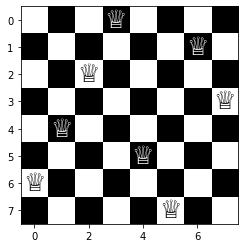

In [121]:
pop_size = 30       #Population size
G = 100             #Number of generations
Pr = 0.8            #Reproduction probability
Pm = 0.3            #Mutation probability
genetic_algorithm(pop_size, G, Pr, Pm)